In [1]:
from polpymer.core_funcs import Polymer, Monomer, Dish
from polpymer.data_funcs import plot_dish, plot_polymer, grow_polymer, \
     generate_N_polymers, expect_observ, error_observ
import numpy as np
import matplotlib.pyplot as plt


c:\Users\Jeroe\Documents\TU Delft\AP3082 Computational Physics\project-2\polpymer\core_funcs.py:488: RuntimeWarning: divide by zero encountered in double_scalars
  W_tilde = sum(w)/N_polymers


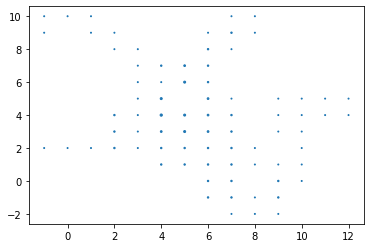

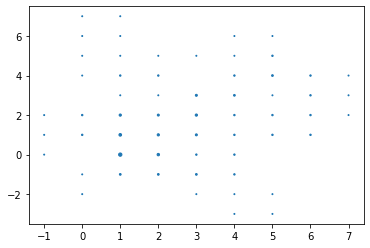

In [4]:


dish = Dish((10,10),(5,5))
dish.PERM(10, 10, 100)

plot_dish(dish, stems=False)

dish.polymer_correlation(bouqet=True)

plot_dish(dish, bouqet=True, stems=False)

corr_matrix = dish.correlation_matrix


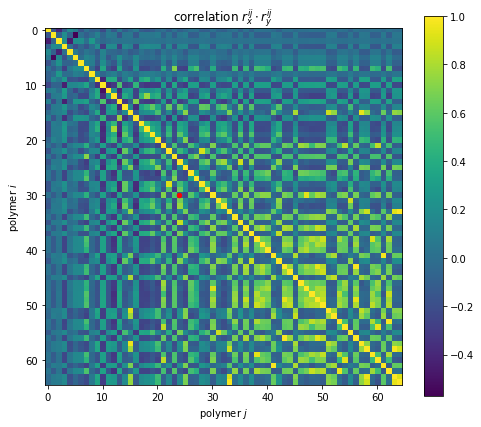

In [5]:
plt.imshow(corr_matrix, origin='upper')
plt.colorbar()
plt.xlabel(r"polymer $j$")
plt.ylabel(r"polymer $i$")
plt.title(r"correlation $r_{x}^{ij} \cdot r_{y}^{ij}$")
plt.scatter(24, 30, marker='.', s=80, color='red')
plt.gcf().set_size_inches(8,7)
plt.savefig('Figures/wow')
plt.show()

In [7]:
dish.correlation()
print(dish.corr_metric)

[ -74.24536438  -95.07875713  110.69057502  -19.30183214  -54.11802986
  282.4837237    25.33945131  698.61962416  120.98214901  301.3162732
  168.08932119  226.82339886  181.28409561  332.57426357  610.99003409
  977.76499168   80.18056479  148.355134    247.88354555  596.25993716
  401.43028219 1190.41211718  453.69810122  893.00541701  664.91986905
  666.79878113  936.57879308  678.60342722  585.84900491  453.73100305
 1277.24917483  626.27381174  447.62199219  943.7115245  1266.83541452
  681.35214219 1362.75365895  656.20528096 1280.96921788 1312.71437206
 1260.44006768  919.10226587  709.44038754 1383.82954597 1287.19657436
  942.30674916 1179.09915348 1331.67967788 1272.85724813 1481.75524508
 1424.41759941  958.75305493  915.06229093 1288.35987981 1163.73764493
  655.85384823 1359.49693907  971.22309871  971.5755016  1283.1894637
 1143.53130831  915.12284228 1293.08484965  972.1472098   954.76087528]


So according to our metric of correlation polymer 24 and polymer 30 should look alike

In [12]:
polymer_24 = dish.polymers[24]
polymer_30 = dish.polymers[30]

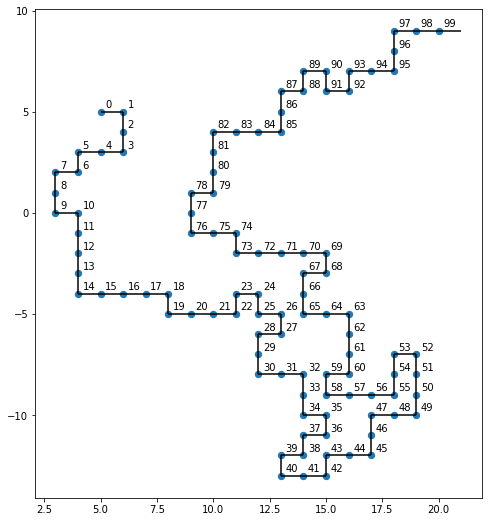

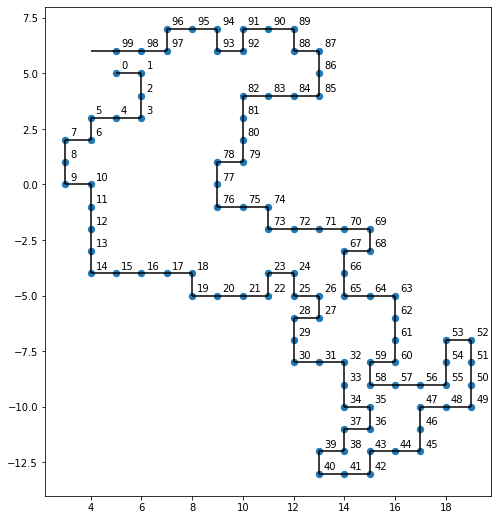

In [17]:
plot_polymer(polymer_24)
plot_polymer(polymer_30)

They do seem to like alike until node 87!

In [16]:
def plot_polymer(polymer: object) -> None:

    x_ = np.asarray([])
    y_ = np.asarray([])

    xlines = np.asarray([])
    xlines_posx = np.asarray([])
    xlines_posy = np.asarray([])
    ylines = np.asarray([])
    ylines_posy = np.asarray([])
    ylines_posx = np.asarray([])

    (xmax, ymax) = polymer.dimensions
    cnt = 0

    for monomer in polymer:
        start = monomer.location
        end = monomer.end_location

        x_ = np.append(x_, start[0])
        y_ = np.append(y_, start[1])

        plt.text(x_[-1]+0.2, y_[-1]+0.2, str(cnt) )
        cnt += 1
        ang = monomer.angle
        if ang == 0 or ang == 2:
            if ang == 0:
                xlines_posx = np.append(xlines_posx, start[0])
            else:
                xlines_posx = np.append(xlines_posx, end[0])
            xlines = np.append(xlines, 1)
            xlines_posy = np.append(xlines_posy, start[1])
        if ang == 1 or ang == 3:
            if ang == 1:
                ylines_posy = np.append(ylines_posy, start[1])
            else:
                ylines_posy = np.append(ylines_posy, end[1])
            ylines = np.append(ylines, 1)
            ylines_posx = np.append(ylines_posx, start[0])


    plt.scatter(x_, y_, linestyle='None', marker='o', s=40)
    plt.vlines(ylines_posx, ylines_posy, ylines_posy+1, color='black')
    plt.hlines(xlines_posy, xlines_posx, xlines_posx+1, color='black')
    plt.gcf().set_size_inches(8,9)
    plt.show()